In [21]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



### reminder: 
* classification problem: Binary classification( ex. spam or not spam)
* multiclass classification: more than one thing or onother.
* multilabel classification : ex. store an article in wikipedia in multiple label(
  deep learning ---> ML; Representation  learning , Artificial intelligenz)
    
    

### creating data to view and fit

In [61]:

from sklearn.datasets import make_circles
# Make 1000 examples
n_samples = 1000

# Create circles
X, Y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [62]:
# our data is litte hard to understand let's vizualise it
cirlcles=pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':Y})
cirlcles



,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


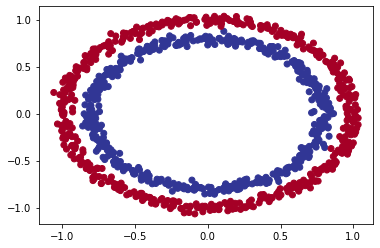

In [63]:
# Visualise with plot

plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu);

In [64]:
# check the shape
X.shape,Y.shape
#check the len
print(len(X))
print(len(Y))
X[5],Y[5]

1000
1000


(array([-0.47964637,  0.67643477]), 1)

In [65]:
### write neural network classification:

In [66]:
tf.random.set_seed(42)

#create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
   # tf.keras.layers.Dense(),
    #tf.kers.layers.Dense(),
]
)
# compile the model:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"])
# fittig th model
model.fit(X,Y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [67]:
# let's try training aour model for langer:
model.fit(X,Y,epochs=200, verbose=0)
model.evaluate(X,Y)

32/32 [==============================] - 0s 942us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [74]:
# add extra layers:
tf.random.set_seed(42)

# create the model:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
               )
#ft the model:
model_2.fit(X,Y,epochs=100,verbose=0)

In [75]:
model_2.evaluate(X,Y)

32/32 [==============================] - 0s 953us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

# Improving our model:
* create the model - we might to add more layers or increse the number of hidden units within 
* vompiling a model - here we might to choose a diferent optmization fuction such as adam
*Fitting a model perhaps we might fit our model for more epochs(leave the training for longer)


In [76]:
tf.random.set_seed(42)
# create the model:

model_3=tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# fitting the model:
model_3.fit(X,Y, epochs=100, verbose=0)

In [77]:
model_3.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

In [78]:
# visualize our model
# plot decision boudary


doing binary classifcation...


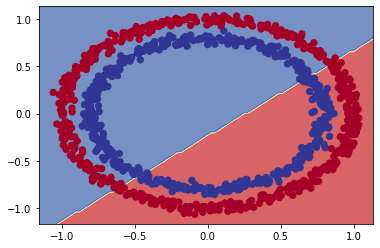

In [95]:
import numpy as np
import numpy as np

def plot_decision_boundary(model, X, y):
  
  #Plots the decision boundary created by a model predicting on X.
  #This function has been adapted from two phenomenal resources:
   #1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   #2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  
# Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max= X[:,1].min()- 0.1, X[:,1].max()+ 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    
plot_decision_boundary(model_3, X, Y)

In [ ]:
#  it's look like our model  trying to draw a stright line throgh the data
# let' try to create a regression data  and draw the best fit line using descison boudary

In [116]:
tf.random.set_seed(42)

X_regression=np.arange(0,1000,5)
Y_regression=np.arange(100,1100,5)

X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]


Y_regression_train=Y_regression[:150]
Y_regression_test=Y_regression[150:]
len(Y_regression_train),len(X_reg_train)

(150, 150)

In [117]:
# create a model for regression data
tf.random.set_seed(42)

#create a model:
model_regression=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_regression.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['mae']
)
# fit the model
model_regression.fit(X_reg_train,Y_regression_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6830 - mae: 43.6830
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 1ms/step - loss: 38.8398 - mae: 38.8398
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 1ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 1ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 1ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 1ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 1ms/step - loss: 38.5599 - mae: 38.5599
Epoch 97/100
5/5 [==============================] - 0s 1ms/step

In [124]:
Y_reg_predict=model_regression.predict(X_reg_test)

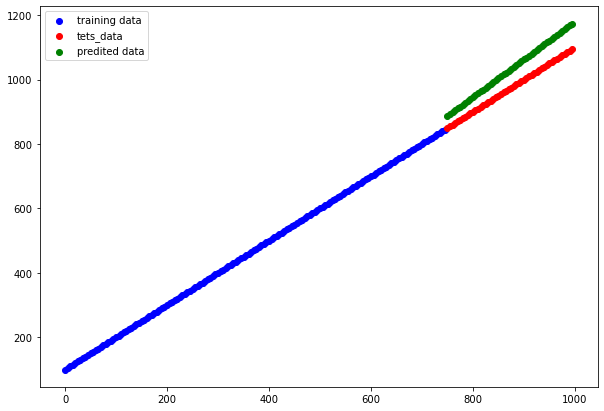

In [126]:
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,Y_regression_train,c='b',label='training data')
plt.scatter(X_reg_test,Y_regression_test,c='r',label='tets_data')
plt.scatter(X_reg_test,Y_reg_predict,c='g',label='predited data')
plt.legend();

In [132]:
#we try  to fit the model circle using other hyperparameter:
tf.random.set_seed(42)

#create the model
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)#output layer
])

# compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy']
               )
# fit the model:
model_4.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4964 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3811 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2380 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9892 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7669 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4930
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4890
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4940
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4930
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4970
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4980
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4970
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4940
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4990
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4970
Epoch 92/100


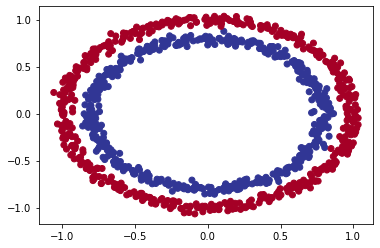

In [136]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu);

doing binary classifcation...


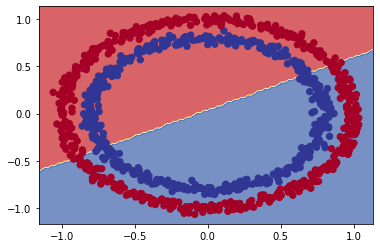

In [137]:
plot_decision_boundary(model_4, X, Y)

In [ ]:
# we will fit the model again , but this time we gonna use actiavtion relu

In [140]:
tf.random.set_seed(42)

# create the model:
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)#output layer 
])
#compile the model:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])
# fit the model:
model_5.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/

32/32 [==============================] - 0s 687us/step - loss: 0.6935 - accuracy: 0.5020
Epoch 83/100
32/32 [==============================] - 0s 548us/step - loss: 0.6936 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 621us/step - loss: 0.6932 - accuracy: 0.5070
Epoch 85/100
32/32 [==============================] - 0s 655us/step - loss: 0.6933 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 569us/step - loss: 0.6935 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 595us/step - loss: 0.6933 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 566us/step - loss: 0.6933 - accuracy: 0.4680
Epoch 89/100
32/32 [==============================] - 0s 528us/step - loss: 0.6934 - accuracy: 0.4590
Epoch 90/100
32/32 [==============================] - 0s 655us/step - loss: 0.6937 - accuracy: 0.4980
Epoch 91/100
32/32 [==============================] - 0s 558us/step - loss: 0.6933 - accuracy: 

doing binary classifcation...


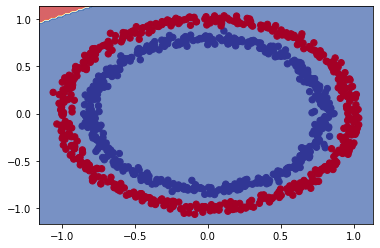

In [142]:
plot_decision_boundary(model_5, X, Y)

In [ ]:
# fitting the model again with multiple layers

In [146]:
tf.random.set_seed(42)
#create a model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)#output layer
])
# compile the model_6
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
# fitting the model:
model_6.fit(X,Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 931us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 1

32/32 [==============================] - 0s 641us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 83/100
32/32 [==============================] - 0s 697us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 613us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 615us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 593us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 602us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 646us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 676us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 660us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 706us/step - loss: 7.7125 - accuracy: 

doing binary classifcation...


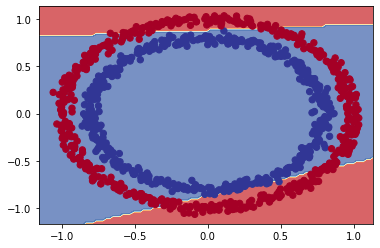

In [147]:
plot_decision_boundary(model_6, X, y)

In [154]:
# one more fiting , actially it' seems like we didn't choose the best sigmoid
# remeber for classification it's better to use sigmoid function.
tf.random.set_seed(42)

# create the model:
model_7= tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# fit the model:
model_7.fit(X,Y,epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 738us/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 911us/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch

32/32 [==============================] - 0s 852us/step - loss: 0.4456 - accuracy: 0.9580
Epoch 83/100
32/32 [==============================] - 0s 924us/step - loss: 0.4360 - accuracy: 0.9630
Epoch 84/100
32/32 [==============================] - 0s 712us/step - loss: 0.4260 - accuracy: 0.9690
Epoch 85/100
32/32 [==============================] - 0s 604us/step - loss: 0.4145 - accuracy: 0.9700
Epoch 86/100
32/32 [==============================] - 0s 615us/step - loss: 0.4059 - accuracy: 0.9740
Epoch 87/100
32/32 [==============================] - 0s 576us/step - loss: 0.3962 - accuracy: 0.9750
Epoch 88/100
32/32 [==============================] - 0s 660us/step - loss: 0.3873 - accuracy: 0.9720
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.9750
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.9750
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.9840

doing binary classifcation...


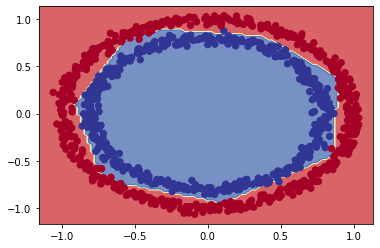

In [155]:
plot_decision_boundary(model_7, X, Y)

* let's see the concept of linear and non-linear functions on action
* first let's have a look about linear and sigmoid function.


In [167]:
A=tf.cast(tf.range(-10,10),tf.float32)
print(A)

tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)


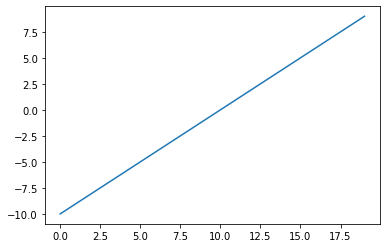

In [168]:
#Visualize
plt.plot(A)

In [169]:
# let's use A as sigmoid fuction:
# sigmoid(x)=1/(1+exp(-x))

In [171]:
def sigmoid(x):
    return 1/(1+tf.exp(A))
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([9.9995458e-01, 9.9987662e-01, 9.9966466e-01, 9.9908900e-01,
       9.9752742e-01, 9.9330717e-01, 9.8201376e-01, 9.5257413e-01,
       8.8079703e-01, 7.3105860e-01, 5.0000000e-01, 2.6894143e-01,
       1.1920292e-01, 4.7425874e-02, 1.7986210e-02, 6.6928510e-03,
       2.4726230e-03, 9.1105117e-04, 3.3535014e-04, 1.2339458e-04],
      dtype=float32)>

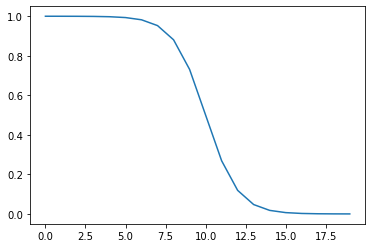

In [172]:
plt.plot(sigmoid(A))

In [ ]:
# let' recreate relu fuction? and see how it's looks like
# takes just positive number in x

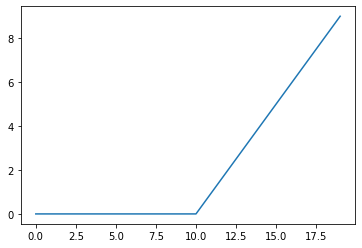

In [175]:
def relu(x):
    return tf.maximum(0,x)
relu(A)
plt.plot(relu(A))

# tehre is one thing that we should learn 
* as we are plotiing A as linear fuction , there  we didn  not need any function , in constrast to sigmoid or relu fuction let' try it now with fuction to see if  is any difference

* as you see the fuctin linear take A as it and draw it without in chagement in value


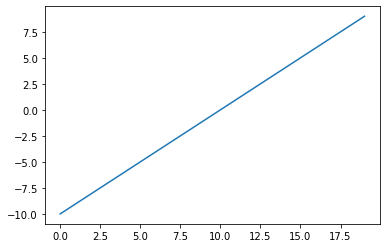

In [179]:

plt.plot(tf.keras.activations.linear(A))


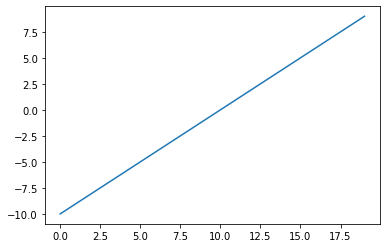

In [180]:
plt.plot(A)

tf.keras.activations.linear(A)==A are the same

In [182]:
tf.keras.activations.linear(A)==A

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [186]:
#len(X)
len(Y)

1000

In [189]:
# split the  training data
X_train, Y_train=X[:800],Y[:800]
# splitting the test data
X_test, Y_test=X[800:],Y[800:]

len(X_train),len(Y_train),len(X_test),len(Y_test)


(800, 800, 200, 200)

In [222]:

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, Y_train, epochs=25)


Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [200]:
# let's evaluate the modl
loss, accuracy= model_8.evaluate(X_test,Y_test)
print(f'loss on the test data: {loss}')
print(f'accuracy on the test data:  {accuracy*100:.2f}%')

7/7 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6000
loss on the test data: 0.664689302444458
accuracy on the test data:  60.00%


doing binary classifcation...
doing binary classifcation...


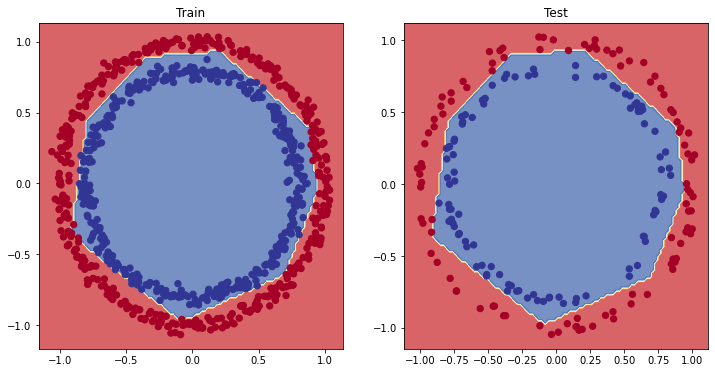

In [221]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=Y_test)
plt.show()






In [ ]:
###### History: 
* This is where we'll get the information for how our model is performing as it learns.

In [226]:
histo=pd.DataFrame(history.history)
histo

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'model_training curve')

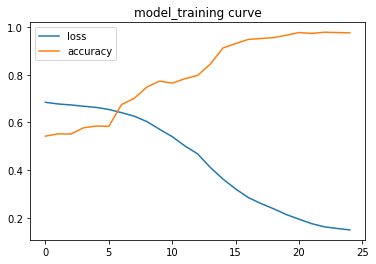

In [228]:
# plotten the dataFrame history:
histo.plot()
plt.title('model_training curve')

#####  because our model are performin weel in model_7 we decrease the learning rate fron 0.01 to 0.001  
* but how we can choose the best learning rate for our model:
* **callback** we can think of accallback as an extra piece of functionality we can add to our model while is training.
* let's training the model with scheduler learning rate-  Visualize the result and see with lr give aus a lower loss

In [236]:
tf.random.set_seed(42)
# create the model:
model_9= tf.keras.Sequential([
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(1,tf.keras.activations.sigmoid)
])
# compile the model:
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy']
               )
# create a learning rate scheduler callback:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# fitting the model:
hist=model_9.fit(X_train,Y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

25/25 [==============================] - 0s 1ms/step - loss: 0.7132 - accuracy: 0.5412
Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7305 - accuracy: 0.4863
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7097 - accuracy: 0.5013
Epoch 85/100
25/25 [==============================] - 0s 601us/step - loss: 0.7254 - accuracy: 0.5038
Epoch 86/100
25/25 [==============================] - 0s 751us/step - loss: 0.7770 - accuracy: 0.5063
Epoch 87/100
25/25 [==============================] - 0s 894us/step - loss: 0.7666 - accuracy: 0.5063
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7564 - accuracy: 0.5163
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7541 - accuracy: 0.4938
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7807 - accuracy: 0.5238
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8123 - accuracy: 0.5213
Epoch 9

In [252]:
df =pd.DataFrame(hist.history) 
#df
hist.history

{'loss': [0.6944887042045593,
  0.6937710046768188,
  0.6930040717124939,
  0.6922441720962524,
  0.6914389729499817,
  0.6905732750892639,
  0.6897599697113037,
  0.6888542771339417,
  0.6880210041999817,
  0.6870952844619751,
  0.686313807964325,
  0.685647189617157,
  0.6847457885742188,
  0.6841598749160767,
  0.6835190653800964,
  0.6829455494880676,
  0.6825613379478455,
  0.6819146871566772,
  0.6815937161445618,
  0.6811153292655945,
  0.680644690990448,
  0.6800821423530579,
  0.6796061992645264,
  0.6789861917495728,
  0.678402304649353,
  0.6777902245521545,
  0.6770332455635071,
  0.6759989261627197,
  0.6753632426261902,
  0.6739270687103271,
  0.6726474761962891,
  0.6711052060127258,
  0.6688365340232849,
  0.6671707034111023,
  0.6660320162773132,
  0.6625295877456665,
  0.655954897403717,
  0.6520614624023438,
  0.6415151357650757,
  0.6209967732429504,
  0.5903931260108948,
  0.5688378214836121,
  0.5346266031265259,
  0.4532853960990906,
  0.34552353620529175,
  0.25

<AxesSubplot:xlabel='epochs'>

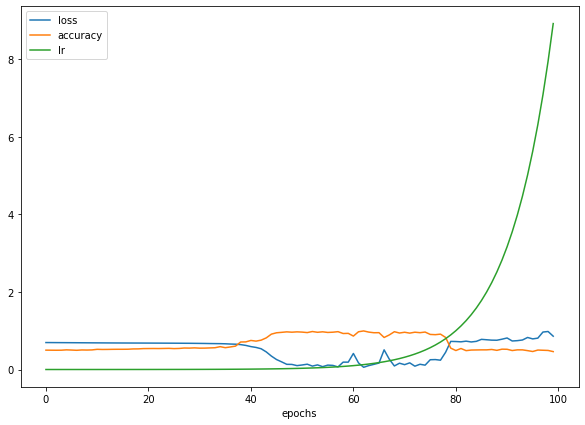

In [242]:
pd.DataFrame(hist.history).plot(figsize=(10,7),xlabel='epochs')

* let's plot learning rate and loss fuction to have a better visualization
* semilogs is a way of visualisation , but it's neeed the lr to plot loss fuction

Text(0.5, 1.0, 'learning rate vs loss')

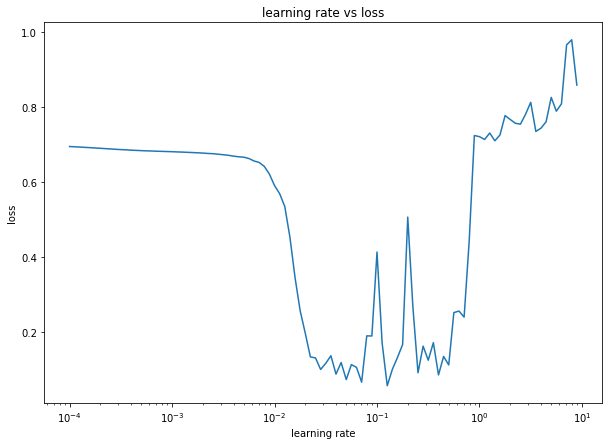

In [264]:
plt.figure(figsize=(10,7))
lr=1e-4*10**(np.arange(100)/20)
plt.semilogx(lr,hist.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

In [265]:

# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [270]:
tf.random.set_seed(42)

# create the mode
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(1,tf.keras.activations.sigmoid)
])
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])

history=model_10.fit(X_train,Y_train,epochs=20)



Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [271]:
model_10.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401858270168304, 0.9900000095367432]

doing binary classifcation...
doing binary classifcation...


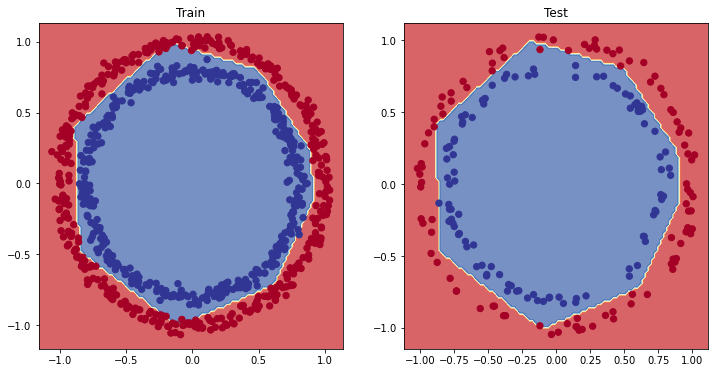

In [282]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=Y_test)
plt.show()

In [286]:
loss, accuracy= model_10.evaluate(X_test,Y_test)
print(f'the loss on the test data :{loss}')
print(f' the accuracy on the test data :{accuracy*100:.2f}%')

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900
the loss on the test data :0.057401858270168304
 the accuracy on the test data :99.00%


In [296]:
# crrate the confusion matrix:
from sklearn.metrics import confusion_matrix
y_pred=model_10.predict(X_test)
y_pred[:10]

array([[9.8526549e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706948e-01],
       [3.9622900e-01],
       [1.8126905e-02],
       [9.6829063e-01],
       [1.9746661e-02],
       [9.9967158e-01],
       [5.6460500e-04]], dtype=float32)

In [292]:
#confusion_matrix(Y_test,y_pred)---> this cmd caused an error why?
# because y_ped is in probability form , but y_test is binary

In [299]:
print(Y_test[:10])
print(y_pred[:10])
tf.round(y_pred)[:10]

[1 1 1 1 0 0 1 0 1 0]
[[9.8526549e-01]
 [9.9923790e-01]
 [9.9032348e-01]
 [9.9706948e-01]
 [3.9622900e-01]
 [1.8126905e-02]
 [9.6829063e-01]
 [1.9746661e-02]
 [9.9967158e-01]
 [5.6460500e-04]]


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [337]:
confusion_matrix(Y_test,tf.round(y_pred))

array([[99,  2],
       [ 0, 99]], dtype=int64)

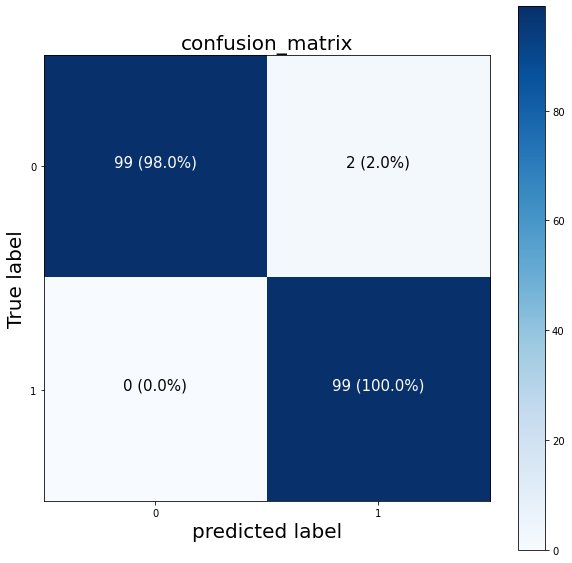

In [357]:
#Confusion matrix:
import itertools
figsize=(10,10)
cm=confusion_matrix(Y_test,tf.round(y_pred))# create matrix
cm_norm=cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]

fig,ax=plt.subplots(figsize=figsize)
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

classes=False
if classes:
    labels=classes
else: 
    labels=np.arange(cm.shape[0])
    
ax.set(title="confusion_matrix",
      xlabel="predicted label",
      ylabel="True label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold=(cm.max()+cm.min())/2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)



In [325]:
a = np.arange(12).reshape(3, 4)
print(a)
# [[0 1 2]
#  [3 4 5]]

print(a.shape)
# (2, 3)

print(a[:, np.newaxis])
# [[[0]
#   [1]
#   [2]]
# 
#  [[3]
#   [4]
#   [5]]]

print(a[:,:, np.newaxis].shape)
# (2, 3, 1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)
[[[ 0  1  2  3]]

 [[ 4  5  6  7]]

 [[ 8  9 10 11]]]
(3, 4, 1)
